In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.metrics import roc_auc_score,roc_curve
import os
from PIL import Image
# "ConcatDataset" and "Subset" are possibly useful when doing semi-supervised learning.
from torch.utils.data import ConcatDataset, DataLoader, Subset, Dataset
from torchvision.datasets import DatasetFolder, VisionDataset
# This is for the progress bar.
import random


torch.cuda.set_device(3)
device = "cuda" if torch.cuda.is_available() else "cpu"

myseed = 11292  # set a random seed for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)


     

# 定義 Autoencoder 模型
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 25, 4, stride=2, padding=1),         
            nn.ReLU(),
            nn.Conv2d(25, 100, 4, stride=2, padding=1),        
            nn.ReLU(),
			nn.Conv2d(100, 400, 4, stride=2, padding=1),         
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
			nn.ConvTranspose2d(400, 100, 4, stride=2, padding=1),
            nn.ReLU(),
			nn.ConvTranspose2d(100, 25, 4, stride=2, padding=1), 
            nn.ReLU(),
            nn.ConvTranspose2d(25, 3, 4, stride=2, padding=1),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split



In [2]:
import os
import re
import cv2

#INTER_LINEAR – a bilinear interpolation (used by default)

def Autodataset(root_dir,label):
    Rh_data = []
    IMG_SIZE = 224
    labels = []
    
    for filename in os.listdir(root_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # 組合完整的檔案路徑
            file_path = os.path.join(root_dir, filename)

            # 讀取照片
            img = cv2.imread(file_path)

            # 確保成功讀取照片
            if img is not None:
                # 將照片 resize 到指定的尺寸
                resized_img = cv2.resize(img, (224, 224),interpolation=cv2.INTER_LINEAR)
                #resized_img=resized_img/255
                #resized_img[0] = (resized_img[0]-0.485)/0.229
                #resized_img[1] = (resized_img[1]-0.456)/0.224
                #resized_img[2] = (resized_img[2]-0.406)/0.225
                
                # 將 resize 後的照片加入列表
                Rh_data.append(resized_img)
            else:
                print(f"無法讀取照片: {file_path}")
                
    for filename in os.listdir(root_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            labels.append(label)

    
    return Rh_data, labels

In [3]:
u94_Rh1_data,u94_Rh1_label = Autodataset(root_dir="semi_anlayic/raif_img",label=0)
d94_Rh1_data,d94_Rh1_label = Autodataset(root_dir="abnor_cat_dog/B",label=1)
print('all are ok')

all are ok


In [4]:
print(len(u94_Rh1_label),len(u94_Rh1_data))

2833 2833


In [5]:
train_data=np.array(u94_Rh1_data)
label=np.array(u94_Rh1_label)

data_targets=[d94_Rh1_data]
data_labels=[d94_Rh1_label]
for i in data_targets:
    gg=np.array(i)
    train_data=np.append(train_data,gg,axis=0)

for i in data_labels:
    jj=np.array(i)
    label=np.append(label,jj)

In [6]:
class RhDataset(Dataset):
    def __init__(self):
        self.x=train_data
        self.y=label

    def __getitem__(self, idx):
        
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

In [7]:
batch_size=32
train_set = RhDataset()
train_data_point, label_0 = train_set[101]
print(label_0)

0


In [8]:
print(len(train_data))
n_total = len(train_data)
n_train = int(0.8 * n_total)
n_test = n_total - n_train 
print(len(train_set))
train_dataset, test_dataset = torch.utils.data.random_split(train_set, [n_train, n_test])

3833
3833


In [9]:
print(len(train_dataset))
print(len(test_dataset))

3066
767


In [10]:
batch_size=32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True,num_workers=0, pin_memory=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[ Train | 001/100 ] loss = 5316.15233
最佳閾值: 4684.33154296875,acc=0.54
model save,最佳acc=0.54
[ Train | 002/100 ] loss = 5304.30787
最佳閾值: 5248.35888671875,acc=0.57
model save,最佳acc=0.57
[ Train | 003/100 ] loss = 5292.50731
最佳閾值: 5349.24560546875,acc=0.61
model save,最佳acc=0.61
[ Train | 004/100 ] loss = 5275.23883
最佳閾值: 4689.2451171875,acc=0.54
[ Train | 005/100 ] loss = 5273.90983
最佳閾值: 5363.15625,acc=0.62
model save,最佳acc=0.62
[ Train | 006/100 ] loss = 5269.76209
最佳閾值: 5055.43017578125,acc=0.54
[ Train | 007/100 ] loss = 5261.40519
最佳閾值: 5424.06640625,acc=0.63
model save,最佳acc=0.63
[ Train | 008/100 ] loss = 5256.15229
最佳閾值: 4775.0634765625,acc=0.50
[ Train | 009/100 ] loss = 5252.66654
最佳閾值: 4598.623046875,acc=0.50
[ Train | 010/100 ] loss = 5258.14227
最佳閾值: 5256.75244140625,acc=0.64
model save,最佳acc=0.64
[ Train | 011/100 ] loss = 5253.92437
最佳閾值: 4990.841796875,acc=0.53
[ Train | 012/100 ] loss = 5249.37979
最佳閾值: 4489.83056640625,acc=0.49
[ Train | 013/100 ] loss = 5258.56954
最佳閾值:

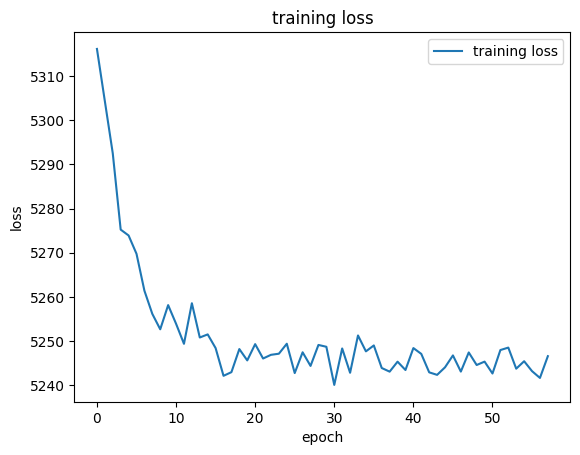

'\nlabels, scores = evaluate_autoencoder(model, test_loader)\n\n# 使用 ROC 曲線下的面積（AUC）來找到最佳閾值\nfpr, tpr, thresholds = roc_curve(labels, scores)\nroc_auc = roc_auc_score(labels, scores)\n\n# 選擇最佳閾值\nbest_threshold_index = np.argmax(tpr - fpr)\nbest_threshold = thresholds[best_threshold_index]\n\nprint(f"最佳閾值: {best_threshold}")\n\n# 儲存最佳閾值下的權重檔\ntorch.save(model.state_dict(), f\'threshold_{myseed}_model.pth\')\n\n# 使用最佳閾值進行評估\nall_labels, all_scores = evaluate_autoencoder(model, test_loader)\npredictions = (np.array(all_scores) > best_threshold).astype(int)\n'

In [52]:
import torch
import torch.nn as nn
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import numpy as np

# 初始化 Autoencoder 模型、損失函數和優化器
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-6)

batch_size=32
num_epochs=100
stale = 0
patience = 20 


loss_train=[]
# 訓練 Autoencoder

best_acc = 0
# 訓練模型
    
tra_loss = []

for epoch in tqdm(range(num_epochs)):
    model.train()
    train_loss = []

    for data in train_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.permute(0, 3, 1, 2)
        inputs = inputs.float()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        #print(loss)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()

    train_loss = sum(train_loss) / len(train_loss)
    tra_loss.append(train_loss)
    print(f"[ Train | {epoch + 1:03d}/{num_epochs:03d} ] loss = {train_loss:.5f}")

        

    model.eval()
    all_labels = []
    all_scores = []
    
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            inputs= inputs.permute(0, 3, 1, 2)
            inputs = inputs.float()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            scores = torch.mean(loss.unsqueeze(0).view(1, -1), dim=1)  # 使用重建誤差作為異常程度分數
            scores = torch.cat([scores] * len(labels))
            all_labels.extend(labels.cpu().numpy())  # 將標籤轉換為 CPU 上的 numpy 陣列
            all_scores.extend(scores.cpu().numpy())  # 將分數轉換為 CPU 上的 numpy 陣列
    
    fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
    roc_auc = roc_auc_score(all_labels, all_scores)
    best_threshold_index = np.argmax(tpr - fpr)
    best_threshold = thresholds[best_threshold_index]
    predictions = (np.array(all_scores) > best_threshold).astype(int)
    acc = (torch.from_numpy(np.array(predictions)) == torch.from_numpy(np.array(all_labels))).float().mean()
    print(f"最佳閾值: {best_threshold},acc={acc:.2f}")
    
    if acc > best_acc:
        torch.save(model.state_dict(), f'threshold_{myseed}_model.pth') # only save best to prevent output memory exceed error
        best_acc = acc
        print(f"model save,最佳acc={best_acc:.2f}")
        stale = 0
    else:
        stale += 1
        if stale > patience:
            print(f"No improvment {patience} consecutive epochs, early stopping")
            break
    #print(f"最佳閾值: {best_threshold},acc={acc:.2f},最佳acc={best_acc:.2f}") 
    
    
plt.plot(tra_loss,label='training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.ylim(0,0.02)
plt.title('training loss')
plt.legend()
plt.show()


#all_labels, predictions = train_autoencoder(model, train_loader, criterion, optimizer, num_epochs=num_epochs)


# 設定閾值
'''
labels, scores = evaluate_autoencoder(model, test_loader)

# 使用 ROC 曲線下的面積（AUC）來找到最佳閾值
fpr, tpr, thresholds = roc_curve(labels, scores)
roc_auc = roc_auc_score(labels, scores)

# 選擇最佳閾值
best_threshold_index = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_index]

print(f"最佳閾值: {best_threshold}")

# 儲存最佳閾值下的權重檔
torch.save(model.state_dict(), f'threshold_{myseed}_model.pth')

# 使用最佳閾值進行評估
all_labels, all_scores = evaluate_autoencoder(model, test_loader)
predictions = (np.array(all_scores) > best_threshold).astype(int)
'''




In [59]:
model_best = Autoencoder().to(device)
model_best.load_state_dict(torch.load(f'threshold_{myseed}_model.pth'))
model_best.eval()

all_labels = []
all_scores = []
    
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        inputs= inputs.permute(0, 3, 1, 2)
        inputs = inputs.float()
        outputs = model_best(inputs)
        loss = criterion(outputs, inputs)
        scores = torch.mean(loss.unsqueeze(0).view(1, -1), dim=1)  # 使用重建誤差作為異常程度分數
        scores = torch.cat([scores] * len(labels))
        all_labels.extend(labels.cpu().numpy())  # 將標籤轉換為 CPU 上的 numpy 陣列
        all_scores.extend(scores.cpu().numpy())  # 將分數轉換為 CPU 上的 numpy 陣列
    
    fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
    roc_auc = roc_auc_score(all_labels, all_scores)
    best_threshold_index = np.argmax(tpr - fpr)
    best_threshold = thresholds[best_threshold_index]
    predictions = (np.array(all_scores) > best_threshold).astype(int)



# 計算混淆矩陣
conf_matrix = confusion_matrix(all_labels, predictions)
print("混淆矩陣：")
print(conf_matrix)


混淆矩陣：
[[332 247]
 [ 83 105]]


In [56]:
xx=312+117
xxx=xx+267+71
print(xx/xxx)

0.559322033898305


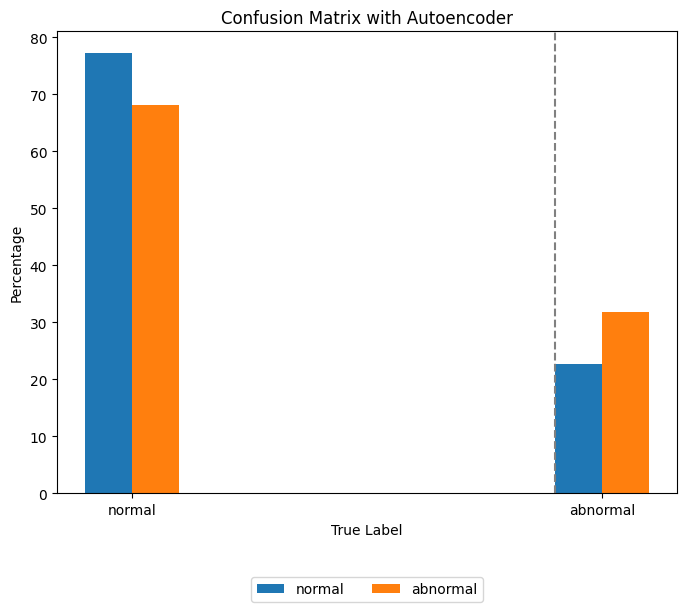

In [50]:
from sklearn.metrics import confusion_matrix
from PIL import Image

# 初始化混淆矩陣

cm_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100




# 设置 x 轴标签
x_labels = ['normal', 'abnormal']

# 转置百分比数据以匹配 Matplotlib 的要求
#percentages = np.array(percentages).T

# 创建条形图
fig, ax = plt.subplots(figsize=(8, 6))  # 設定圖形的大小
width = 0.1  # 条形宽度
x = np.arange(len(x_labels))

for i, label in enumerate(x_labels):
    #print(type(percentages[i]),label)
    ax.bar(x + i * width, cm_percentage[i], width, label=label)
    if i < len(x_labels) - 1:  # 在除最后一个标签之外的每个标签后面添加垂直线
        ax.axvline(x=(i + 1) - 0.05, color='gray', linestyle='--')

# 设置图表标签和标题
ax.set_xlabel('True Label')
ax.set_ylabel('Percentage')
ax.set_title(f'Confusion Matrix with Autoencoder')

# 设置 x 轴标签和图例
ax.set_xticks(x + width * (len(x_labels) - 1) / 2)
ax.set_xticklabels(x_labels)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2)

fig.savefig(f'autoencoder_{myseed}.png', bbox_inches='tight') # 使用bbox_inches='tight'以確保完整保存圖片
plt.show()